# Project 2: Student Performance Analytics Dashboard

## Problem Statement
Many students struggle academically or mentally during their academic journey, increasing their risk of dropping out. Educational institutions need an effective way to identify such students early to provide timely interventions.

## Objective
Analyze behavioral and academic data to:
- Discover key patterns related to dropout risk.
- Understand how GPA, attendance, and mental health impact performance.
- Identify students who are most at risk and visualize critical trends.

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("C:/Users/Asus/Downloads/RISE/student_management_dataset.csv")

## Dataset Overview

The dataset contains data for 1000 students, including:
- Academic metrics: GPA, course performance, credits
- Behavioral metrics: attendance rate, class participation, online learning time
- Well-being indicators: mental health score, social engagement
- Risk classification: dropout risk flag (1 = at risk, 0 = not at risk)

In [7]:
df.head()

,Student_ID,Age,Gender,Ethnicity,Socioeconomic_Status,Parental_Education_Level,Disability_Status,GPA,Past_Academic_Performance,Current_Semester_Performance,...,Attendance_Rate,Number_of_Late_Submissions,Class_Participation_Score,Online_Learning_Hours,Library_Usage_Hours,Disciplinary_Actions,Social_Engagement_Score,Mental_Health_Score,Extracurricular_Activities,Dropout_Risk
0,1,24,Female,Hispanic,Medium,Master’s,0,3.26,Above Average,90,...,62.150096,3,9.465024,15.168495,5.803625,1,8.128234,1.703851,2,0
1,2,21,Female,Asian,Low,High School,0,2.04,Below Average,78,...,89.773096,1,2.465213,4.112098,10.242415,0,5.869194,2.094571,3,0
2,3,28,Male,Black,Medium,Bachelor’s,0,2.42,Average,96,...,52.481231,1,8.030946,10.885028,13.461105,1,7.606479,7.959876,0,0
3,4,25,Female,Black,Medium,Bachelor’s,0,2.48,Average,52,...,92.754433,1,6.120496,16.085622,4.988602,0,1.818807,1.609816,1,0
4,5,22,Male,Other,Medium,Bachelor’s,0,3.94,Below Average,50,...,82.908124,0,3.768950,10.740182,14.173335,1,1.695860,9.170435,3,0


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Ethnicity                     1000 non-null   object 
 4   Socioeconomic_Status          1000 non-null   object 
 5   Parental_Education_Level      1000 non-null   object 
 6   Disability_Status             1000 non-null   int64  
 7   GPA                           1000 non-null   float64
 8   Past_Academic_Performance     1000 non-null   object 
 9   Current_Semester_Performance  1000 non-null   int64  
 10  Courses_Failed                1000 non-null   int64  
 11  Credits_Completed             1000 non-null   int64  
 12  Study_Hours_per_Week          1000 non-null   int64  
 13  Atte

,Student_ID,Age,Disability_Status,GPA,Current_Semester_Performance,Courses_Failed,Credits_Completed,Study_Hours_per_Week,Attendance_Rate,Number_of_Late_Submissions,Class_Participation_Score,Online_Learning_Hours,Library_Usage_Hours,Disciplinary_Actions,Social_Engagement_Score,Mental_Health_Score,Extracurricular_Activities,Dropout_Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,23.454000,0.104000,2.748090,73.913000,2.134000,63.940000,21.637000,74.248593,4.438000,5.014036,9.941880,7.604376,1.013000,4.931489,5.365163,2.102000,0.018000
std,288.819436,3.525665,0.305413,0.723728,14.304826,1.410686,32.189199,9.789948,14.483748,2.883829,2.856842,5.744361,4.303992,0.819453,2.815435,2.584300,1.428158,0.133018
min,1.000000,18.000000,0.000000,1.510000,50.000000,0.000000,10.000000,5.000000,50.051115,0.000000,0.001186,0.004813,0.132339,0.000000,0.001755,1.003808,0.000000,0.000000
25%,250.750000,20.000000,0.000000,2.110000,62.000000,1.000000,35.000000,13.000000,62.210499,2.000000,2.595011,4.995095,3.849201,0.000000,2.556750,3.041812,1.000000,0.000000
50%,500.500000,23.000000,0.000000,2.750000,74.000000,2.000000,63.000000,21.000000,74.043992,4.000000,5.089403,9.967857,7.647967,1.000000,4.827250,5.416790,2.000000,0.000000
75%,750.250000,27.000000,0.000000,3.380000,86.000000,3.000000,93.000000,30.000000,86.570873,7.000000,7.447977,14.741389,11.288576,2.000000,7.257788,7.544573,3.000000,0.000000
max,1000.000000,29.000000,1.000000,4.000000,99.000000,4.000000,119.000000,39.000000,99.981781,9.000000,9.990095,19.996334,14.998390,2.000000,9.968150,9.988509,4.000000,1.000000


In [11]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Ethnicity                       0
Socioeconomic_Status            0
Parental_Education_Level        0
Disability_Status               0
GPA                             0
Past_Academic_Performance       0
Current_Semester_Performance    0
Courses_Failed                  0
Credits_Completed               0
Study_Hours_per_Week            0
Attendance_Rate                 0
Number_of_Late_Submissions      0
Class_Participation_Score       0
Online_Learning_Hours           0
Library_Usage_Hours             0
Disciplinary_Actions            0
Social_Engagement_Score         0
Mental_Health_Score             0
Extracurricular_Activities      0
Dropout_Risk                    0
dtype: int64

## Correlation Analysis

We use a correlation matrix and heatmap to identify relationships between variables. This helps in understanding which factors influence dropout risk the most.

In [14]:
cols = ['GPA', 'Attendance_Rate', 'Online_Learning_Hours', 
        'Library_Usage_Hours', 'Class_Participation_Score', 
        'Mental_Health_Score', 'Dropout_Risk']
df[cols].corr()

,GPA,Attendance_Rate,Online_Learning_Hours,Library_Usage_Hours,Class_Participation_Score,Mental_Health_Score,Dropout_Risk
GPA,1.000000,0.020546,-0.013039,0.009356,0.001943,-0.021815,-0.186911
Attendance_Rate,0.020546,1.000000,-0.038864,0.015164,0.027064,-0.015950,-0.114998
Online_Learning_Hours,-0.013039,-0.038864,1.000000,-0.026510,0.002116,-0.004887,0.001859
Library_Usage_Hours,0.009356,0.015164,-0.026510,1.000000,0.031496,0.075097,-0.037248
Class_Participation_Score,0.001943,0.027064,0.002116,0.031496,1.000000,0.004133,-0.033457
Mental_Health_Score,-0.021815,-0.015950,-0.004887,0.075097,0.004133,1.000000,-0.151652
Dropout_Risk,-0.186911,-0.114998,0.001859,-0.037248,-0.033457,-0.151652,1.000000


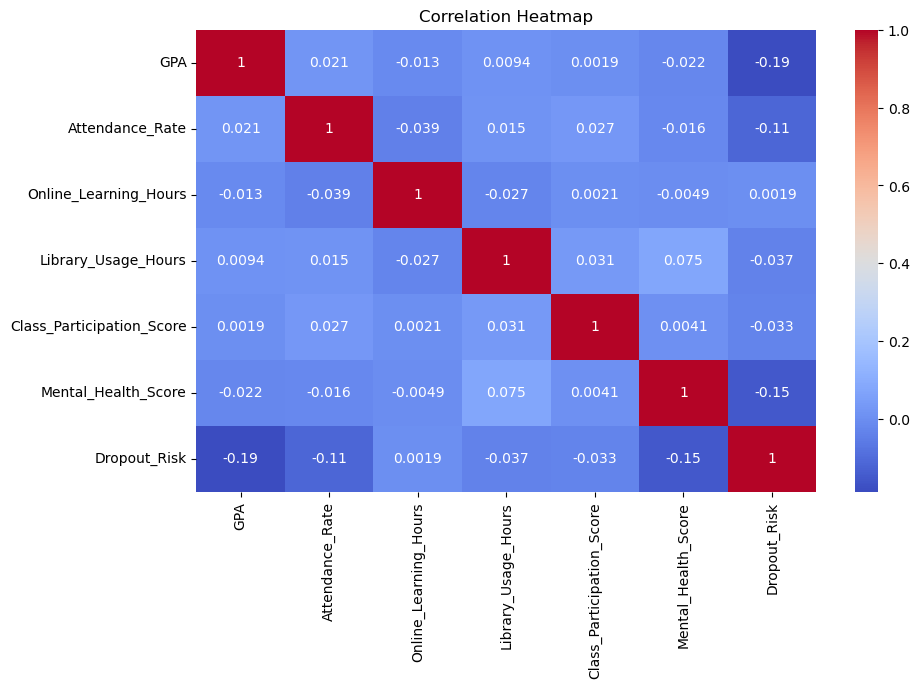

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Visual Analysis

To support our numeric findings, we created the following visualizations:

- **Boxplot**: GPA distribution by dropout status
- **Scatter plot**: Attendance vs GPA, colored by risk
- **Histogram**: Mental health scores for at-risk vs non-risk groups

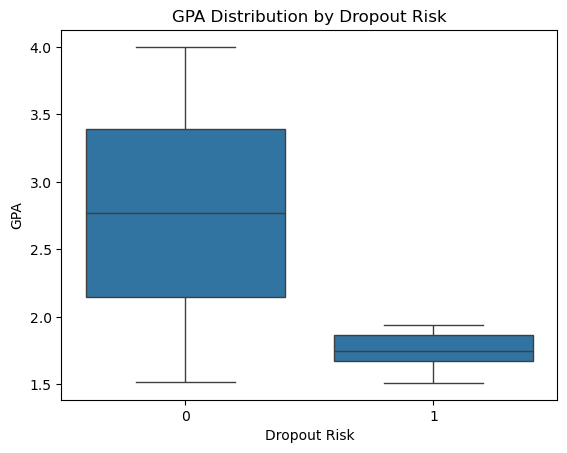

In [18]:
sns.boxplot(x='Dropout_Risk', y='GPA', data=df)
plt.title("GPA Distribution by Dropout Risk")
plt.xlabel("Dropout Risk")
plt.ylabel("GPA")
plt.show()

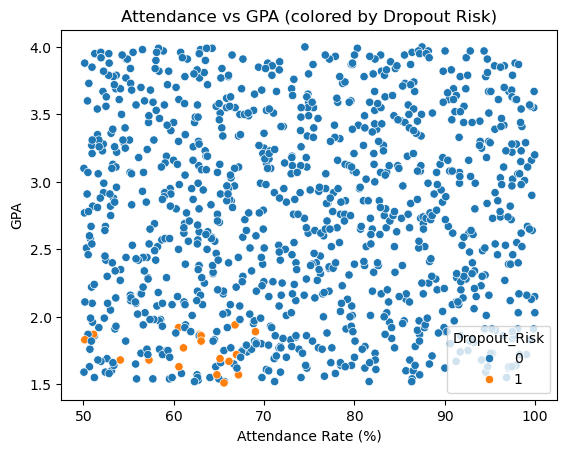

In [21]:
sns.scatterplot(x='Attendance_Rate', y='GPA', hue='Dropout_Risk', data=df)
plt.title("Attendance vs GPA (colored by Dropout Risk)")
plt.xlabel("Attendance Rate (%)")
plt.ylabel("GPA")
plt.show()

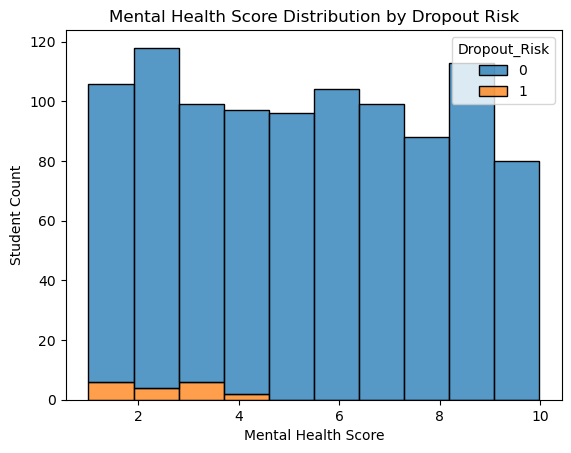

In [23]:
sns.histplot(data=df, x='Mental_Health_Score', hue='Dropout_Risk', multiple='stack', bins=10)
plt.title("Mental Health Score Distribution by Dropout Risk")
plt.xlabel("Mental Health Score")
plt.ylabel("Student Count")
plt.show()

## Custom At-Risk Flag Creation

While the dataset contains a `Dropout_Risk` column, we created our own `At_Risk_Flag` using logic:
- GPA < 2.0
- OR Attendance Rate < 60%
- OR Mental Health Score < 5

In [26]:
df['At_Risk_Flag'] = (
    (df['GPA'] < 2.0) | 
    (df['Attendance_Rate'] < 60) | 
    (df['Mental_Health_Score'] < 5)
).astype(int)

df['At_Risk_Flag'].value_counts()

At_Risk_Flag
1    658
0    342
Name: count, dtype: int64

In [28]:
df[df['At_Risk_Flag'] == 1].head()

,Student_ID,Age,Gender,Ethnicity,Socioeconomic_Status,Parental_Education_Level,Disability_Status,GPA,Past_Academic_Performance,Current_Semester_Performance,...,Number_of_Late_Submissions,Class_Participation_Score,Online_Learning_Hours,Library_Usage_Hours,Disciplinary_Actions,Social_Engagement_Score,Mental_Health_Score,Extracurricular_Activities,Dropout_Risk,At_Risk_Flag
0,1,24,Female,Hispanic,Medium,Master’s,0,3.26,Above Average,90,...,3,9.465024,15.168495,5.803625,1,8.128234,1.703851,2,0,1
1,2,21,Female,Asian,Low,High School,0,2.04,Below Average,78,...,1,2.465213,4.112098,10.242415,0,5.869194,2.094571,3,0,1
2,3,28,Male,Black,Medium,Bachelor’s,0,2.42,Average,96,...,1,8.030946,10.885028,13.461105,1,7.606479,7.959876,0,0,1
3,4,25,Female,Black,Medium,Bachelor’s,0,2.48,Average,52,...,1,6.120496,16.085622,4.988602,0,1.818807,1.609816,1,0,1
5,6,24,Female,White,Medium,Bachelor’s,0,3.89,Average,68,...,9,0.013680,18.159254,0.203724,2,8.628000,3.534851,4,0,1


## Conclusion

This project aimed to explore patterns and signals of dropout risk among students using academic, behavioral, and well-being data.

### Key Findings:

- **GPA** had the strongest negative correlation with dropout risk (-0.18).
- **Mental Health Score** showed a moderate negative relationship (-0.15).
- **Attendance Rate** contributed to risk but with weak correlation (-0.11).
- **Engagement metrics** like participation or online learning showed minimal impact on dropout prediction.

### Custom Risk Detection:

Our custom flag, based on GPA, attendance, and mental health, offers a more proactive approach for identifying vulnerable students — even before institutional systems might notice.

## Recommendations

- Offer academic mentoring and tutoring to students with GPA below 2.0.
- Provide mental health counseling and peer support groups to those scoring low on wellness.
- Monitor attendance and automate early alerts when students dip below a 60% threshold.
- Combine academic and emotional metrics to form a holistic view of student well-being.

## Final Note

With this dashboard and logic, educational institutions can make data-informed decisions and offer personalized support — not just to improve retention, but to transform the student experience.